<a href="https://colab.research.google.com/github/ChristopherTomala02/PROYECTO-1P/blob/main/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Puedes usar RTB para Python o Matlab:**
 Para un robot Sawyer obtenga: La tabla de parámetros DH  
 El jacobiano para una configuración deseada
La matriz de proyección del espacio nulo.
  
Genere un mínimo de 2 conjuntos de movimientos en el espacio nulo y gráficalos para demostrar la teoría de los movimientos internos.   
  ¿Qué pasaría si tuvieras diferentes dimensiones (coordenadas m) a nivel de tarea?
Explicar Trabajarás en parejas.  AnteriorSiguiente

# Para un robot Sawyer obtenga

In [ ]:
!pip install roboticstoolbox-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.7/187.7 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 31.2 MB/s e

# The DH parameters table

In [ ]:
#Importar
import roboticstoolbox as rtb

#Robot Sawyer
sawyer = rtb.models.DH.Sawyer()#Se usaron el RTB para facilitar la carga de datos
print(sawyer)


DHRobot: Sawyer (by Rethink Robotics), 7 joints (RRRRRRR), dynamics, standard DH parameters
┌─────┬────────┬───────┬────────┐
│ θⱼ  │   dⱼ   │  aⱼ   │   ⍺ⱼ   │
├─────┼────────┼───────┼────────┤
│  q1 │  0.317 │ 0.081 │ -90.0° │
│  q2 │ 0.1925 │     0 │ -90.0° │
│  q3 │    0.4 │     0 │ -90.0° │
│  q4 │ 0.1685 │     0 │ -90.0° │
│  q5 │    0.4 │     0 │ -90.0° │
│  q6 │ 0.1363 │     0 │ -90.0° │
│  q7 │ 0.1338 │     0 │   0.0° │
└─────┴────────┴───────┴────────┘

┌──┬──┐
└──┴──┘

┌──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ name │ q0  │ q1  │ q2  │ q3  │ q4  │ q5  │ q6  │
├──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│   qr │  0° │  0° │  0° │  0° │  0° │  0° │  0° │
│   qz │  0° │  0° │  0° │  0° │  0° │  0° │  0° │
└──────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┘



# The Jacobian for a desired configuration

In [ ]:
from math import pi
#Establecemos la configuración
qi = sawyer.qr #reposo
qf= [-pi/3, pi/3, -pi/6, pi/6, -pi/4, pi/4, -pi/6]
qt = rtb.jtraj(qi, qf, 100)#trayectoria
# Jacobiano
configuracionJ= qt.q[50]
J = sawyer.jacob0(configuracionJ)
print('Jacobiano')
print(J)

Jacobiano
[[-1.50448269e-01 -7.14611228e-02  8.30247456e-04 -2.57695761e-01
  -1.34783348e-01 -8.15263868e-02  0.00000000e+00]
 [ 4.55307186e-02  4.22083783e-02  6.87978313e-02  7.00450268e-02
   4.22663499e-02  6.42028228e-02  0.00000000e+00]
 [-1.17666054e-18  1.18309303e-01  2.02433725e-02  7.30707472e-02
   3.65958646e-02  8.43831044e-02  0.00000000e+00]
 [ 1.27709420e-17  5.08562759e-01 -4.37885211e-01 -2.95148115e-01
   1.98543720e-01  6.35899365e-01 -4.73380643e-01]
 [-8.19028280e-18  8.61024924e-01  2.58636080e-01 -9.45999792e-01
  -1.97972759e-01  7.71280335e-01  4.17978926e-01]
 [ 1.00000000e+00  1.16843603e-16 -8.61024924e-01 -1.34059630e-01
   9.59889149e-01  2.75434622e-02 -7.75373706e-01]]


# The null space projection matrix

In [ ]:
import numpy as np
mIdentidad = np.identity(7)
Jt= J.T #Transpuesta de la Jacobina
#Pseudoinversa de la Jacobina
PIJ= np.dot(Jt, np.linalg.inv(np.dot(J,Jt)))
#proyección del espacio nulo
proyeccionN = mIdentidad - np.dot(PIJ, J)
print('Proyección del espacio nulo')
print(proyeccionN)
# Mostramos la matriz de proyección del espacio nulo

Proyección del espacio nulo
[[ 0.19958972  0.14061982  0.02896182  0.04058751 -0.31185634 -0.10400216
  -0.17153067]
 [ 0.14061982  0.0990729   0.02040488  0.0285957  -0.21971664 -0.07327413
  -0.12085097]
 [ 0.02896182  0.02040488  0.00420255  0.00588952 -0.04525246 -0.01509141
  -0.02489026]
 [ 0.04058751  0.0285957   0.00588952  0.00825366 -0.06341746 -0.02114933
  -0.03488157]
 [-0.31185634 -0.21971664 -0.04525246 -0.06341746  0.48727148  0.16250202
   0.26801444]
 [-0.10400216 -0.07327413 -0.01509141 -0.02114933  0.16250202  0.05419341
   0.08938115]
 [-0.17153067 -0.12085097 -0.02489026 -0.03488157  0.26801444  0.08938115
   0.14741626]]


Genere un mínimo de 2 conjuntos de movimientos en el espacio nulo y gráficalos para demostrar la teoría de los movimientos internos.

In [ ]:
# Generamos dos vectores aleatorios en el espacio nulo
p1 = [pi/4, pi/6, pi/8, pi/10, pi/12, pi/14, pi/16]
p2 = [-pi/4, pi/8, -pi/8, pi/10, pi/12, pi/14, pi/16]
#Movimientos
m1= np.dot(proyeccionN, p1)
m2= np.dot(proyeccionN, p2)
v1= np.dot(J,m1)
v2= np.dot(J,m2)

pefincial = sawyer.fkine(qi).t
pef1= sawyer.fkine(m1).t
pef2 = sawyer.fkine(m2).t

print('Movimiento 1')
print(pefincial)
print(pef1)
print('Movimiento 2')
print(pefincial)
print(pef2)

Movimiento 1
[0.081   0.1603  0.18325]
[0.07697305 0.16619664 0.18254118]
Movimiento 2
[0.081   0.1603  0.18325]
[0.08539054 0.12648179 0.18052327]


# Gráficalos para demostrar la teoría de los movimientos internos.



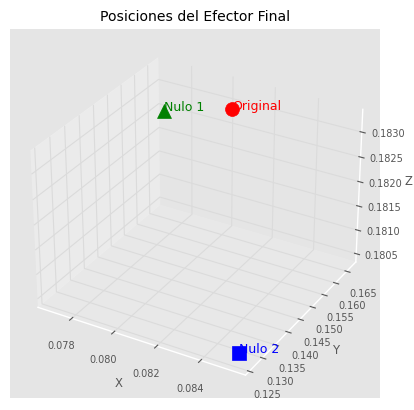

In [ ]:
import matplotlib.pyplot as plt
fig= plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Posiciones del Efector Final')
# Configuración de la posición original
ax.scatter(pefincial[0], pefincial[1], pefincial[2],
           color='red', marker='o', s=100, label='Original')
ax.text(pefincial[0], pefincial[1], pefincial[2],
        'Original', color='red', fontsize=9)

# primer movimiento en el espacio nulo
ax.scatter(pef1[0], pef1[1], pef1[2],
           color='green', marker='^', s=100, label=' Nulo 1')
ax.text(pef1[0], pef1[1], pef1[2],
        'Nulo 1', color='green', fontsize=9)

# segundo movimiento en el espacio nulo
ax.scatter(pef2[0], pef2[1], pef2[2],
           color='blue', marker='s', s=100, label='Nulo 2')
ax.text(pef2[0], pef2[1], pef2[2],
        'Nulo 2', color='blue', fontsize=9)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# ¿Qué pasaría si tuvieras diferentes dimensiones (coordenadas m) a nivel de tarea?

Segun lo que hemos investigado muchos manipuladores modernos son redundantes: tienen más de seis grados de libertad. Podemos aprovechar esta redundancia haciendo que el robot optimice una medida de rendimiento y, al mismo tiempo, logre el objetivo original.


